In [1]:
pwd()

"/home/xyu/github/BulkLMM.jl/test/notebooks"

In [2]:
cd("..")

In [3]:
Threads.nthreads()

1

In [4]:
include("BXDdata_for_test.jl"); ## Load BXD data used for testing:

In [5]:
using LoopVectorization

In [6]:
include("../src/scan_LiteQTL.jl"); ## Load multithreaded functions to be tested:

In [7]:
include("../src/parallel_helpers.jl");

In [8]:
BLAS.set_num_threads(24)

In [9]:
BLAS.get_num_threads()

24

In [10]:
hsq_list = collect(0:10) * 0.1;

In [11]:
kinship_Gc = CSV.read("run-gemma/output/kinship.cXX.txt", DataFrame, delim = '\t', header = false) |> Matrix;

In [12]:
@time bulkscan_LODs = bulkscan(pheno, geno, kinship_Gc, hsq_list);

  9.593756 seconds (305.30 k allocations: 22.274 GiB, 6.51% gc time, 1.48% compilation time)


In [23]:
bulkscan_LODs[1:6, :]

6×35556 Matrix{Float64}:
 0.117494  0.121561  0.110276  0.0494144  …  0.0472748  0.355458  0.548261
 0.117494  0.121561  0.110276  0.0494144     0.0472748  0.355458  0.548261
 0.117494  0.121561  0.110276  0.0494144     0.0472748  0.355458  0.548261
 0.117494  0.121561  0.110276  0.0494144     0.0472748  0.355458  0.548261
 0.117494  0.121561  0.110276  0.0494144     0.0472748  0.355458  0.548261
 0.117494  0.121561  0.110276  0.0494144  …  0.0472748  0.355458  0.548261

In [24]:
gemma = "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64";

In [5]:
gemma_results = readdlm("run-gemma/output/gemma_results.txt.assoc.txt", '\t');

In [6]:
gemma_results

7322×10 Matrix{Any}:
   "chr"  "rs"             "ps"   "n_miss"  …        "l_mle"   "p_lrt"
 -9       "rs31443144"   -9      0             100000.0       0.9681
 -9       "rs6269442"    -9      0             100000.0       0.9681
 -9       "rs32285189"   -9      0             100000.0       0.9681
 -9       "rs258367496"  -9      0             100000.0       0.9681
 -9       "rs32430919"   -9      0          …  100000.0       0.9681
 -9       "rs36251697"   -9      0             100000.0       0.9681
 -9       "rs30658298"   -9      0             100000.0       0.9681
 -9       "rs51852623"   -9      0             100000.0       0.9681
 -9       "rs31879829"   -9      0             100000.0       0.9681
 -9       "rs36742481"   -9      0          …  100000.0       0.9681
 -9       "rs6365999"    -9      0             100000.0       0.9681
 -9       "rs13470446"   -9      0             100000.0       0.968107
  ⋮                                         ⋱                 
 -9       "rs31

In [7]:
using Plots

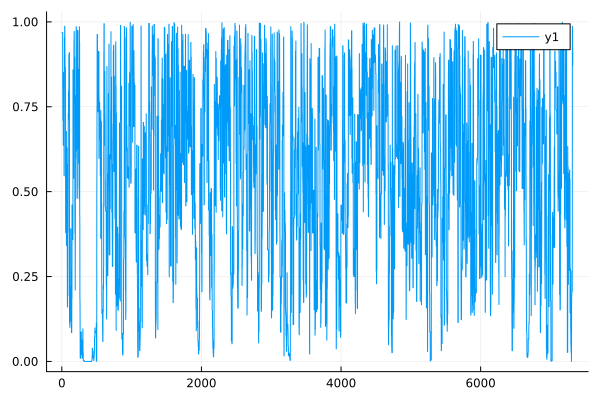

In [8]:
plot(gemma_results[2:end, 10])

In [26]:
function p2lod(pval::Float64, df::Int64)
    
    lrs = invlogcdf(Chisq(df), log(1-pval))
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

p2lod (generic function with 1 method)

In [17]:
gemma_LODs = map(x -> p2lod(x, 1), gemma_results[2:end, 10]);

In [18]:
hcat(gemma_LODs, bulkscan_LODs[:, 7919])

7321×2 Matrix{Float64}:
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347286  0.0230375
 0.000347136  0.0230399
 0.0136122    0.149115
 ⋮            
 0.349491     0.346613
 0.349491     0.346613
 0.349491     0.346613
 0.150758     0.149648
 5.69796e-5   0.177024
 5.69796e-5   0.177024
 0.000387442  0.20417
 0.00241246   0.242513
 0.00212172   0.238575
 0.00567796   0.275557
 0.00288966   0.235776
 0.00288966   0.235776

In [27]:
scan_null_lod = scan_null(reshape(pheno[:, 7919], :, 1), geno, kinship_Gc; reml = true);

In [28]:
scan_alt_lod = scan_alt(reshape(pheno[:, 7919], :, 1), geno, kinship_Gc; reml = false);

In [29]:
hcat(gemma_LODs, scan_null_lod[3], scan_alt_lod[3], bulkscan_LODs[:, 7919])

7321×4 Matrix{Float64}:
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347286  0.00783497  0.00753141  0.0230375
 0.000347136  0.00783393  0.00753041  0.0230399
 0.0136122    0.00979026  0.00957543  0.149115
 ⋮                                    
 0.349491     0.0949866   0.111349    0.346613
 0.349491     0.0949866   0.111349    0.346613
 0.349491     0.0949866   0.111349    0.346613
 0.150758     0.0124035   0.0180153   0.149648
 5.69796e-5   0.00756242  0.0062785   0.177024
 5.69796e-5   0.00756242  0.0062785   0.177024
 0.000387442  0.0140298   0.0123

In [22]:
sumSqDiff(reshape(gemma_LODs, :, 1), reshape(bulkscan_LODs[:, 7919], :, 1))

Inf